In [207]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

startDate = datetime(2015,3,1)
endDate = datetime(2021,12,1)

In [211]:
#clean data functions
sector_dict={
            'S&P 500 Materials Sector GICS Level 1 Index': 'material',
            'S&P 500 Energy Sector GICS Level 1 Index':	'energy',
            'S&P 500 Industrials Sector GICS Level 1 Index':'industrial',
            'S&P 500 Consumer Discretionary Sector GICS Level 1 Index':'consumer_discretionary',
            'S&P 500 Consumer Staples Sector GICS Level 1 Index':'consumer_staple',
            'S&P 500 Health Care Sector GICS Level 1 Index':'health_care',
            'S&P 500 Information Technology Sector GICS Level 1 Index':'IT',
            'S&P 500 Financials Sector GICS Level 1 Index': 'financial',
            'S&P 500 Real Estate Sector GICS Level 1 Index': 'real_estate',
            'S&P 500 Utilities Sector GICS Level 1 Index': 'utility',
            'S&P 500 Communication Services Sector GICS Level 1 Index':'telecom'
            }

sector_list = ['energy','material','industrial','consumer_discretionary','consumer_staple','health_care','financial','IT','telecom','utility','real_estate']

def clean_fdmt_data(df):
    df=df.drop(columns=['Unnamed: 0'])
    df=df.rename(columns={'3 Months Ending':'Dates'})
    df=df.set_index('Dates')
    df=df.rename(columns=sector_dict)
    df=df.truncate(after=endDate)
    return(df)

def factor_neutralize(df):
    df_cal = df
    df_mean = df_cal.rolling(10).mean()
    df_std = df_cal.rolling(10).std()
    df_neutral = df_cal.sub(df_mean).div(df_std)
    return(df_neutral)

def get_factor_exposure(sector):
    rename_dict={sector:'PE'}
    PE_exposures=PE_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'PB'}
    PB_exposures=PB_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'EV2Sales'}
    EV2Sales_exposures=EV2Sales_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'EV2EBIT'}
    EV2EBIT_exposures=EV2EBIT_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'EV2EBITDA'}
    EV2EBITDA_exposures=EV2EBITDA_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'DIV_Y'}
    DIV_Y_exposures=DIV_Y_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'GM'}
    GM_exposures=GM_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'OM'}
    OM_exposures=OM_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'PM'}
    PM_exposures=PM_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'ROA'}
    ROA_exposures=ROA_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'ROE'}
    ROE_exposures=ROE_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    factor_exposure=PE_exposures.join(PB_exposures).join(EV2Sales_exposures).join(EV2EBIT_exposures).join(EV2EBITDA_exposures).join(DIV_Y_exposures).join(GM_exposures).join(OM_exposures).join(PM_exposures).join(ROA_exposures).join(ROE_exposures)

    return(factor_exposure)



#import&clean Data
#PE ratio
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/PE Ratio.xlsx',parse_dates=['3 Months Ending'])
PE_df=clean_fdmt_data(df)
PE_neutral=factor_neutralize(PE_df).truncate(before=startDate,after=endDate).fillna(method='ffill')
print(PE_neutral)

#PB ratio
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/PB Ratio.xlsx',parse_dates=['3 Months Ending'])
PB_df=clean_fdmt_data(df)
PB_neutral=factor_neutralize(PB_df).truncate(before=startDate,after=endDate).fillna(method='ffill')


#EV2Sales
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/EV2Sales.xlsx',parse_dates=['3 Months Ending'])
EV2Sales_df=clean_fdmt_data(df)
EV2Sales_neutral=factor_neutralize(EV2Sales_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#EV2EBIT
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/EV2EBIT.xlsx',parse_dates=['3 Months Ending'])
EV2EBIT_df=clean_fdmt_data(df)
EV2EBIT_neutral=factor_neutralize(EV2EBIT_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#EV2EBITDA
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/EV2EBITDA.xlsx',parse_dates=['3 Months Ending'])
EV2EBITDA_df=clean_fdmt_data(df)
EV2EBITDA_neutral=factor_neutralize(EV2EBITDA_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#Dividend Yield
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/Dividend Yield.xlsx',parse_dates=['3 Months Ending'])
DIV_Y_df=clean_fdmt_data(df)
DIV_Y_neutral=factor_neutralize(DIV_Y_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#Gross Margin
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/Gross Margin.xlsx',parse_dates=['3 Months Ending'])
GM_df=clean_fdmt_data(df)
GM_neutral=factor_neutralize(GM_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#Operating Margin
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/operatingmargin.xlsx',parse_dates=['3 Months Ending'])
OM_df=clean_fdmt_data(df)
OM_neutral=factor_neutralize(OM_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#profit Margin
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/profit margin.xlsx',parse_dates=['3 Months Ending'])
PM_df=clean_fdmt_data(df)
PM_neutral=factor_neutralize(PM_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#return on asset
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/return on asset.xlsx',parse_dates=['3 Months Ending'])
ROA_df=clean_fdmt_data(df)
ROA_neutral=factor_neutralize(ROA_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#return on equity
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/return on equity.xlsx',parse_dates=['3 Months Ending'])
ROE_df=clean_fdmt_data(df)
ROE_neutral=factor_neutralize(ROE_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

            material    energy  industrial  consumer_discretionary  \
Dates                                                                
2015-03-31  0.250174  1.248436    1.033208                1.381818   
2015-06-30 -0.453613  2.220463    0.444315                1.242335   
2015-09-30 -2.197491  1.934680   -1.648695               -0.140377   
2015-12-31  0.185610  2.425163   -0.355143                0.207213   
2016-03-31  0.445430  2.519315   -0.572229               -0.708270   
2016-06-30  1.178808  2.546069   -0.146755               -1.539556   
2016-09-30  0.991334  2.511131    0.523264               -1.270955   
2016-12-30  1.843149  1.377031    1.446414               -0.801803   
2017-03-31  1.527068  0.236847    1.463508                0.340885   
2017-06-30  1.320292 -0.206100    1.699095                1.167628   
2017-09-29  1.003780 -0.418995    1.635703                1.217962   
2017-12-29  0.458102 -0.568755    1.568642                2.006881   
2018-03-30 -0.819312

           PE    Return
0    1.248436 -0.025894
1    2.220463 -0.181053
2    1.934680 -0.006403
3    2.425163  0.031152
4    2.519315  0.108086
..        ...       ...
292  1.976428  0.040877
293  2.032515  0.083809
294  1.756385  0.123117
295  0.569119  0.002451
296 -0.400970  0.049912

[297 rows x 2 columns]
           PE    Return        PB
0    1.248436 -0.025894 -0.974056
1    2.220463 -0.181053 -1.143457
2    1.934680 -0.006403 -2.018495
3    2.425163  0.031152 -1.293542
4    2.519315  0.108086 -0.600704
..        ...       ...       ...
292  1.976428  0.040877 -0.330553
293  2.032515  0.083809 -0.022987
294  1.756385  0.123117  0.931776
295  0.569119  0.002451  1.598618
296 -0.400970  0.049912  1.101016

[297 rows x 3 columns]
           PE    Return        PB  EV2Sales
0    1.248436 -0.025894 -0.974056  0.889011
1    2.220463 -0.181053 -1.143457  1.607945
2    1.934680 -0.006403 -2.018495  1.127917
3    2.425163  0.031152 -1.293542  2.122900
4    2.519315  0.108086 -0.600704  2

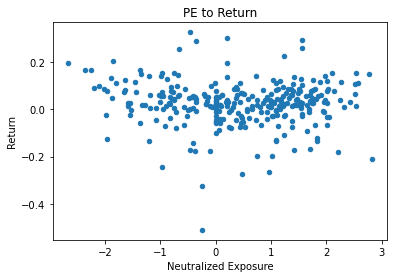

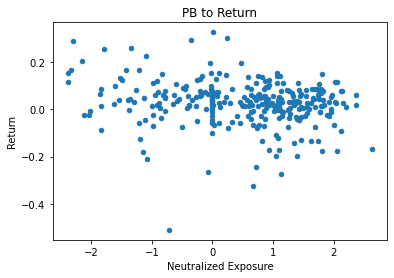

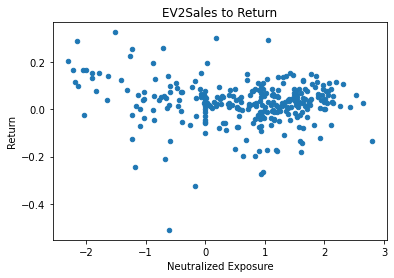

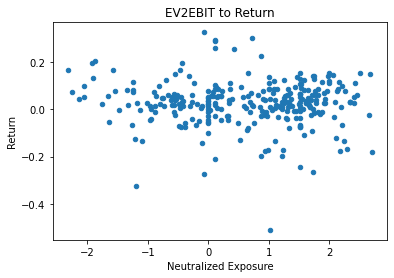

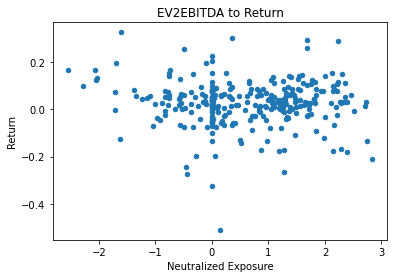

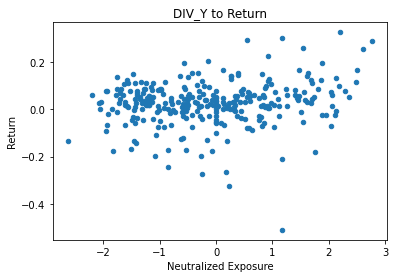

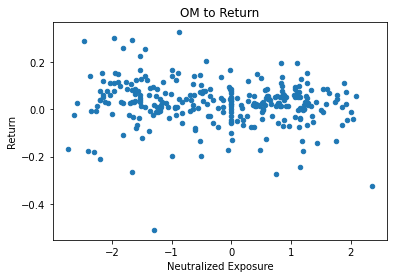

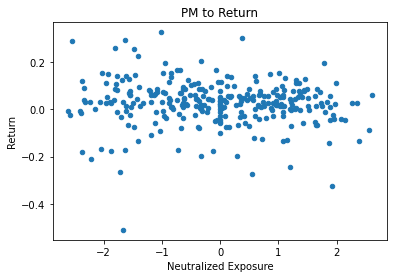

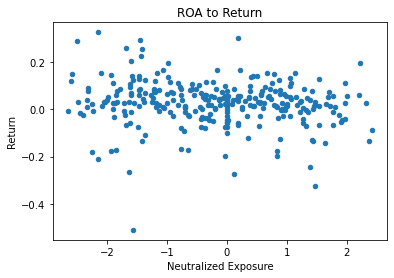

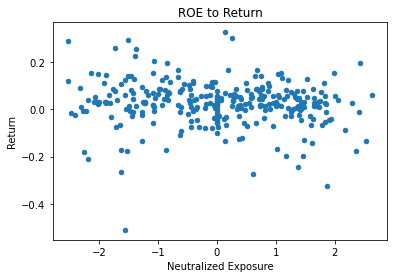

In [210]:
'''
---------------------------------------------------- Return to Factor Exposure------------------------------------------------------------------------------------
'''

sector_index=pd.read_csv('/Users/JackRitian/Desktop/sector rotation/data/index data/sector_index.csv',parse_dates=['Date'])
sector_index=sector_index.set_index('Date').truncate(before=startDate,after=endDate)
quarterly_index_rtn=sector_index.resample("Q").last().pct_change().shift(-1).dropna()

def exposure_to_return(factor,plot): #on a factor base
    exposures=[]
    returns=[]
    for sector in sector_list:
        factor_exposure=get_factor_exposure(sector)
        factor_exposure=factor_exposure.truncate(before=startDate,after=endDate)
        for exposure in factor_exposure[factor]:
            exposures.append(exposure)
        for rtn in quarterly_index_rtn[sector]:
            returns.append(rtn)
        
    exposure_to_return={'Neutralized Exposure':exposures,'Return':returns}
    df=pd.DataFrame(exposure_to_return)

    if plot == True:
        df.plot.scatter(x='Neutralized Exposure',y='Return')
        plt.title(factor+' to Return')
    
    return(df)


factor_list=['PE','PB','EV2Sales','EV2EBIT','EV2EBITDA','DIV_Y','OM','PM','ROA','ROE']

for factor in factor_list:
    if factor == factor_list[0]:
        
        df = exposure_to_return(factor,True).rename(columns={'Neutralized Exposure':factor})
    else:
        new_df = exposure_to_return(factor,True).rename(columns={'Neutralized Exposure':factor}).drop(columns=['Return'])
        df=df.join(new_df)
    print(df)

In [164]:
def split_sets(df,factor_list,y_name,shuffle,normalized_y):
    
    #shuffle the set
    if shuffle == True:
        df = df.sample(frac=1).reset_index(drop=True)
        
    return_df = df.copy(deep=True)
    rtn_df = return_df['Return']
    #normalized y
    if normalized_y == True:
        mean = rtn_df.mean()
        print('The mean is ', mean)
        std = rtn_df.std()
        for i in range(0,len(df[y_name])):
            df.loc[i,y_name]=(rtn_df[i]-mean)/std

    #get the classification signal
    for i in range(0,len(df[y_name])):
        if df[y_name][i] >= 0:
            df.loc[i,y_name]=1
        else:
            df.loc[i,y_name]=-1
    
    first_cut=int(np.floor(0.6*len(df[y_name])))
    second_cut=int(np.floor(0.8*len(df[y_name])))

    Y_train = df[y_name][0:first_cut]
    X_train = df[factor_list][0:first_cut]
    rtn_train = rtn_df[0:first_cut]
    
    X_train = X_train.to_numpy()
    Y_train = Y_train.to_numpy()
    rtn_train = rtn_train.to_numpy()

    Y_valid = df[y_name][first_cut:second_cut]
    Y_valid = Y_valid.reset_index(drop=True)
    X_valid = df[factor_list][first_cut:second_cut]
    X_valid = X_valid.reset_index(drop=True)
    rtn_valid = rtn_df[first_cut:second_cut]
    rtn_valid = rtn_valid.reset_index(drop=True)
    X_valid = X_valid.to_numpy()
    Y_valid = Y_valid.to_numpy()
    rtn_valid = rtn_valid.to_numpy()
    
    Y_test = df[y_name][second_cut:]
    Y_test = Y_test.reset_index(drop=True)
    X_test = df[factor_list][second_cut:]
    X_test = X_test.reset_index(drop=True)
    rtn_test = rtn_df[second_cut:]
    rtn_test = rtn_test.reset_index(drop=True)
    X_test = X_test.to_numpy()
    Y_test = Y_test.to_numpy()
    rtn_test = rtn_test.to_numpy()

    return X_train, Y_train, rtn_train, X_valid, Y_valid, rtn_valid, X_test, Y_test, rtn_test

In [197]:
#on Time Series With no shuffle

def get_sector_exposure(sector,factor_list):    
    factor_exposure=get_factor_exposure(sector)
    print(factor_exposure)
    factor_exposure=factor_exposure[factor_list].truncate(after=endDate)
    df = factor_exposure
    return df

startDate = datetime(2012,12,1)
endDate = datetime(2021,12,1)
date_list = quarterly_index_rtn.index.to_list()

for sector in sector_list:
    rtn_list=quarterly_index_rtn[sector].to_list()
    df =get_sector_exposure(sector,factor_list)
    df['Return'] = rtn_list
    df = df.reset_index(drop=True)

    X_train, Y_train, rtn_train, X_valid, Y_valid, rtn_valid, X_test, Y_test, rtn_test= split_sets(df,factor_list,'Return',False,False)

    if sector == sector_list[0]:
        X_train_total = X_train
        Y_train_total = Y_train
        rtn_train_total = rtn_train
        X_valid_total = X_valid
        Y_valid_total = Y_valid
        rtn_valid_total = rtn_valid
        X_test_total = X_test
        Y_test_total = Y_test
        rtn_test_total = rtn_test
    else:
        X_train_total = np.vstack((X_train_total, X_train))
        Y_train_total = np.hstack((Y_train_total,Y_train))
        rtn_train_total = np.hstack((rtn_train_total,rtn_train))
        X_valid_total = np.vstack((X_valid_total,X_valid))
        Y_valid_total = np.hstack((Y_valid_total,Y_valid))
        rtn_valid_total = np.hstack((rtn_valid_total,rtn_valid))
        X_test_total = np.vstack((X_test_total,X_test))
        Y_test_total = np.hstack((Y_test_total,Y_test))
        rtn_test_total = np.hstack((rtn_test_total,rtn_test))

                  PE        PB  EV2Sales   EV2EBIT  EV2EBITDA     DIV_Y  \
Dates                                                                     
2015-03-31  1.248436 -0.974056  0.889011  2.661100   2.217718  2.107960   
2015-06-30  2.220463 -1.143457  1.607945  2.707288   2.386131  1.750636   
2015-09-30  1.934680 -2.018495  1.127917  1.517428   2.510677  2.132188   
2015-12-31  2.425163 -1.293542  2.122900  1.517428   2.727056  1.619696   
2016-03-31  2.519315 -0.600704  2.304001  1.517428   2.214212  0.981199   
2016-06-30  2.546069  0.540305  2.257513  1.517428   2.710361  0.205409   
2016-09-30  2.511131  0.772490  1.890750  1.517428   0.210456 -0.237047   
2016-12-30  1.377031  1.700591  1.569192  1.517428  -0.342279 -1.039229   
2017-03-31  0.236847  0.730455  0.535602  1.517428  -0.494359 -0.921286   
2017-06-30 -0.206100 -0.074234 -0.065014  1.517428  -0.553116 -0.473510   
2017-09-29 -0.418995  0.528012 -0.076275  1.517428  -0.564073  0.550645   
2017-12-29 -0.568755  0.7

In [110]:
Total_up_NO = 0
Total_down_NO = 0

for num in Y_train_total:
    if num >0:
        Total_up_NO += 1
    else:
        Total_down_NO +=1

print("There are",Total_up_NO,'possitive samples and', Total_down_NO,'negative samples in the training set ')

There are 160 possitive samples and 71 negative samples in the training set 


In [114]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,max_iter=1000,hidden_layer_sizes=(10, 10), random_state=1)
clf.fit(X_train_total, Y_train_total)
print(clf.out_activation_)

logistic


In [76]:
valid_y_pred=clf.predict(X_valid_total)
win_num=0
total_rtn=0
rtn_list=[]
trading_len = len(rtn_valid_total)/(11*4) # we have eleven sector with quarterly frequency, yields to 11*4 samples per year 

for i in range(0,len(valid_y_pred)):
    if valid_y_pred[i] == Y_valid_total[i]:
        win_num += 1
    rtn = valid_y_pred[i]*rtn_valid_total[i]
    rtn_list.append(rtn)
    total_rtn += rtn

sharpe_ratio=(np.mean(rtn_list)*4)/(np.std(rtn_list)*4**(1/2))
print('The winning rate on validation set is '+ str(win_num/len(valid_y_pred)))
print('The cumulative return on validation set is '+ str(total_rtn/trading_len))
print('The sharpe ratio is',sharpe_ratio)

The winning rate on validation set is 0.5584415584415584
The cumulative return on validation set is 0.29611125627315504
The sharpe ratio is 0.1510510563514396


In [77]:
valid_up_NO = 0
valid_down_NO = 0

for num in Y_valid_total:
    if num >0:
        valid_up_NO += 1
    else:
        valid_down_NO +=1

print("There are",valid_up_NO,'possitive samples and', valid_down_NO,'negative samples in the validation set')

There are 54 possitive samples and 23 negative samples in the validation set


In [78]:
valid_pred_up_NO = 0
valid_pred_down_NO = 0

for num in valid_y_pred:
    if num >0:
        valid_pred_up_NO += 1
    else:
        valid_pred_down_NO +=1

print("There are",valid_pred_up_NO,'possitive samples and', valid_pred_down_NO,'negative samples in the validation prediction.')

There are 28 possitive samples and 49 negative samples in the validation prediction.


In [126]:
total_up_correct = 0
total_down_correct = 0
for i in range(len(Y_valid_total)):
    if valid_y_pred[i] >0:
        if valid_y_pred[i] == Y_valid_total[i]:
            total_up_correct += 1
    else:
        if valid_y_pred[i] == Y_valid_total[i]:
            total_down_correct +=1

up_correct_rate = total_up_correct/valid_pred_up_NO  
down_correct_rate = total_down_correct/valid_pred_down_NO
print('On Validation Set')
print('There are ',total_up_correct,'correct up prediction')
print('There are ',total_down_correct,'correct down prediction')
print('The Correct Rate on possitive prediction is',up_correct_rate)
print('The Correct Rate on negative prediction is',down_correct_rate)

On Validation Set
There are  24 correct up prediction
There are  19 correct down prediction
The Correct Rate on possitive prediction is 0.8571428571428571
The Correct Rate on negative prediction is 0.3877551020408163


In [133]:
test_y_pred=clf.predict(X_test_total)
win_num=0
total_rtn=0
rtn_list=[]
trading_len = len(rtn_test_total)/(11*4) # we have eleven sector with quarterly frequency, yields to 11*4 samples per year 

for i in range(0,len(test_y_pred)):
    if test_y_pred[i] == Y_test_total[i]:
        win_num += 1
    rtn = test_y_pred[i]*rtn_test_total[i]
    rtn_list.append(rtn)
    total_rtn += rtn
print(win_num)
sharpe_ratio=(np.mean(rtn_list)*4)/(np.std(rtn_list)*4**(1/2))
print('The winning rate on test set is '+ str(win_num/len(test_y_pred)))
print('The Annually cumulative return on test set is '+ str(total_rtn/trading_len))
print('The sharpe ratio is',sharpe_ratio)

53
The winning rate on test set is 0.6022727272727273
The Annually cumulative return on test set is 0.9464650429475655
The sharpe ratio is 0.30881065781442246


In [130]:
test_up_NO = 0
test_down_NO = 0
for num in Y_test_total:
    if num >0:
        test_up_NO += 1
    else:
        test_down_NO +=1

print("There are",test_up_NO,'possitive samples and', test_down_NO,'negative samples in the test set ')

There are 68 possitive samples and 20 negative samples in the test set 


In [125]:
test_pred_up_NO = 0
test_pred_down_NO = 0

for num in test_y_pred:
    if num >0:
        test_pred_up_NO += 1
    else:
        test_pred_down_NO +=1

print("There are",test_pred_up_NO,'possitive samples and', test_pred_down_NO,'negative samples in the test prediction.')

There are 51 possitive samples and 37 negative samples in the test prediction.


In [132]:
total_up_correct = 0
total_down_correct = 0

for i in range(len(Y_test_total)):
    if test_y_pred[i] >0:
        if test_y_pred[i] == Y_test_total[i]:
            total_up_correct += 1
    if test_y_pred[i] <0:
        if test_y_pred[i] == Y_test_total[i]:
            total_down_correct +=1

up_correct_rate = total_up_correct/test_pred_up_NO  
down_correct_rate = total_down_correct/test_pred_down_NO
print('On Test Set')
print('There are ',total_up_correct,'correct up prediction')
print('There are ',total_down_correct,'correct down prediction')
print('The Correct Rate on possitive prediction is',up_correct_rate)
print('The Correct Rate on negative prediction is',down_correct_rate)

On Test Set
There are  42 correct up prediction
There are  11 correct down prediction
The Correct Rate on possitive prediction is 0.8235294117647058
The Correct Rate on negative prediction is 0.2972972972972973


In [153]:
#only trade on positive prediction
win_num=0
total_rtn=0
rtn_list=[]
trading_len = len(rtn_test_total)/(11*4) # we have eleven sector with quarterly frequency, yields to 11*4 samples per year 

for i in range(0,len(test_y_pred)):
    if test_y_pred[i] > 0:
        rtn = test_y_pred[i]*rtn_test_total[i]
        rtn_list.append(rtn)
        total_rtn += rtn

sharpe_ratio=(np.mean(rtn_list)*4)/(np.std(rtn_list)*4**(1/2))

print('The Annually cumulative return on test set is '+ str(total_rtn/trading_len))
print('The sharpe ratio is',sharpe_ratio)

The Annually cumulative return on test set is 1.2267319930912488
The sharpe ratio is 0.9681232988033571


In [165]:
#on Time Series With no shuffle and Normalized return

def get_sector_exposure(sector,factor_list):    
    factor_exposure=get_factor_exposure(sector)
    factor_exposure=factor_exposure[factor_list].truncate(after=endDate)
    df = factor_exposure
    return df

startDate = datetime(2012,12,1)
endDate = datetime(2021,12,1)
date_list = quarterly_index_rtn.index.to_list()

for sector in sector_list:
    rtn_list=quarterly_index_rtn[sector].to_list()
    df =get_sector_exposure(sector,factor_list)
    df['Return'] = rtn_list
    df = df.reset_index(drop=True)

    X_train, Y_train, rtn_train, X_valid, Y_valid, rtn_valid, X_test, Y_test, rtn_test= split_sets(df,factor_list,'Return',False,True)

    if sector == sector_list[0]:
        X_train_total = X_train
        Y_train_total = Y_train
        rtn_train_total = rtn_train
        X_valid_total = X_valid
        Y_valid_total = Y_valid
        rtn_valid_total = rtn_valid
        X_test_total = X_test
        Y_test_total = Y_test
        rtn_test_total = rtn_test
    else:
        X_train_total = np.vstack((X_train_total, X_train))
        Y_train_total = np.hstack((Y_train_total,Y_train))
        rtn_train_total = np.hstack((rtn_train_total,rtn_train))
        X_valid_total = np.vstack((X_valid_total,X_valid))
        Y_valid_total = np.hstack((Y_valid_total,Y_valid))
        rtn_valid_total = np.hstack((rtn_valid_total,rtn_valid))
        X_test_total = np.vstack((X_test_total,X_test))
        Y_test_total = np.hstack((Y_test_total,Y_test))
        rtn_test_total = np.hstack((rtn_test_total,rtn_test))

The mean is  0.0055112294855276245
The mean is  0.02640412914250342
The mean is  0.030475282585255368
The mean is  0.04445836750618715
The mean is  0.021380661732764615
The mean is  0.0356868232381764
The mean is  0.03395503115787016
The mean is  0.05580914625441263
The mean is  0.019155121270378474
The mean is  0.01957793594445292
The mean is  0.0209322374081322


In [166]:
Total_up_NO = 0
Total_down_NO = 0

for num in Y_train_total:
    if num >0:
        Total_up_NO += 1
    else:
        Total_down_NO +=1

print("There are",Total_up_NO,'possitive samples and', Total_down_NO,'negative samples in the training set ')

There are 112 possitive samples and 119 negative samples in the training set 


In [147]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,max_iter=1000,hidden_layer_sizes=(10, 10), random_state=1)
clf.fit(X_train_total, Y_train_total)
print(clf.out_activation_)

logistic


In [149]:
valid_y_pred=clf.predict(X_valid_total)
print(clf.score(X_valid_total,Y_valid_total))

In [155]:
test_up_NO = 0
test_down_NO = 0
for num in Y_test_total:
    if num >0:
        test_up_NO += 1
    else:
        test_down_NO +=1

print("There are",test_up_NO,'possitive samples and', test_down_NO,'negative samples in the test set ')

There are 52 possitive samples and 36 negative samples in the test set 


In [158]:
test_pred_up_NO = 0
test_pred_down_NO = 0

for num in test_y_pred:
    if num >0:

        test_pred_up_NO += 1
    else:
        test_pred_down_NO +=1

print("There are",test_pred_up_NO,'possitive samples and', test_pred_down_NO,'negative samples in the test prediction.')

There are 30 possitive samples and 58 negative samples in the test prediction.


In [159]:
total_up_correct = 0
total_down_correct = 0

for i in range(len(Y_test_total)):
    if test_y_pred[i] >0:
        if test_y_pred[i] == Y_test_total[i]:
            total_up_correct += 1
    if test_y_pred[i] <0:
        if test_y_pred[i] == Y_test_total[i]:
            total_down_correct +=1

up_correct_rate = total_up_correct/test_pred_up_NO  
down_correct_rate = total_down_correct/test_pred_down_NO
print('On Test Set')
print('There are ',total_up_correct,'correct up prediction')
print('There are ',total_down_correct,'correct down prediction')
print('The Correct Rate on possitive prediction is',up_correct_rate)
print('The Correct Rate on negative prediction is',down_correct_rate)

On Test Set
There are  22 correct up prediction
There are  28 correct down prediction
The Correct Rate on possitive prediction is 0.7333333333333333
The Correct Rate on negative prediction is 0.4827586206896552


In [152]:
test_y_pred=clf.predict(X_test_total)
print(clf.score(X_test_total,Y_test_total))
#only trade on positive prediction
win_num=0
total_rtn=0
rtn_list=[]
trading_len = len(rtn_test_total)/(11*4) # we have eleven sector with quarterly frequency, yields to 11*4 samples per year 

for i in range(0,len(test_y_pred)):
    if test_y_pred[i] > 0:
        rtn = test_y_pred[i]*rtn_test_total[i]
        rtn_list.append(rtn)
        total_rtn += rtn

sharpe_ratio=(np.mean(rtn_list)*4)/(np.std(rtn_list)*4**(1/2))

print('The Annually cumulative return on test set is '+ str(total_rtn/trading_len))
print('The sharpe ratio is',sharpe_ratio)

0.5681818181818182
The Annually cumulative return on test set is 1.2267319930912488
The sharpe ratio is 0.9681232988033571
